## Test if the mean of hourly bike rentals reduces if "Snowfall" is non zero in winter season. 

### Assumptions
1. The population is approximately normally distributed.
2. Sample observations were randomly drawn from a population.
3. The samples are independent.





### Hypothesis: <br>
$H_0 = \mu_1 = \mu_2$ <br>
$H_1 = \mu_1 > \mu_2$  --> $\mu_1$ - population mean for zero snowfall, $\mu_2$ - population mean for non zero snowfall  <br>

### T-test used for hypothesis testing .

In [ ]:
import numpy as np 
import pandas as pd
import scipy.stats as stats

data = pd.read_csv('SeoulBikeData.csv')
data = data[data["Functioning Day"]=="Yes"]
data_winter = data[data["Seasons"]=="Winter"]


data_snowfall_0_rentedbike = data_winter[data_winter["Snowfall (cm)"]==0]["Rented Bike Count"]
data_snowfall_1_rentedbike = data_winter[data_winter["Snowfall (cm)"]>0]["Rented Bike Count"]

# using ttest_ind function to perform two-tailed test .
t_stat, p_val = stats.ttest_ind(data_snowfall_0_rentedbike, data_snowfall_1_rentedbike, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)

# taking alpha as 0.05 .
# p_val less than 0.05 since it is one-tailed test .
if p_val < 0.05:
    print("Reject null hypothesis")


t-statistic: 12.587491780039079
p-value: 3.335926423244896e-33
Reject null hypothesis


In [2]:
# calculating mean, std and number of data points for snowfall_0 and snowfall_1 for doing the calculations manually for ttest .

snowfall_0_std = data_snowfall_0_rentedbike.std()
snowfall_0_mean = data_snowfall_0_rentedbike.mean()
snowfall_0_num = len(data_snowfall_0_rentedbike)

snowfall_1_std = data_snowfall_1_rentedbike.std()
snowfall_1_mean = data_snowfall_1_rentedbike.mean()
snowfall_1_num = len(data_snowfall_1_rentedbike)


### Two sample t-test Formula

$t = \frac{(\overline{x}_1-\overline{x}_2)-(\mu_1-\mu_2)}{\sqrt{\frac{S_1^2}{n_1}+\frac{S_2^2}{n_2}}}$

$\overline{x}_1$ = sample mean of first sample <br>
$\overline{x}_2$ = sample mean of second sample<br>
$\mu_1$= Mean of first population<br>
$\mu_2$= Mean of second population<br>
$S_1^2$= sample variance in first population<br>
$S_2^2$= sample variance in second population<br>
$n_1$= sample size of first group<br>
$n_2$= sample size of second group<br>



In [3]:
# calculating t_value and p_value manually .

sse = np.sqrt(snowfall_0_std**2/(snowfall_0_num)+snowfall_1_std**2/(snowfall_1_num))
sample_mean_diff = snowfall_0_mean - snowfall_1_mean
hypothesis = 0 

a = snowfall_0_std**2/(snowfall_0_num)
b = snowfall_1_std**2/(snowfall_1_num)

dof = (a+b)**2/((a**2/(snowfall_0_num-1))+(b**2/(snowfall_1_num-1)))

t_value = (sample_mean_diff - hypothesis)/sse
p_value = stats.t.sf(np.abs(t_value),dof)*2
print(f't_value: {t_value}, p_value: {p_value}')

if p_val < 0.05:
    print("Reject null hypothesis")



t_value: 12.587491780039079, p_value: 3.335926423244896e-33
Reject null hypothesis


#### Hence mean of hourly bike rentals reduces if "Snowfall" is non zero in winter season by 95% confidence level.


## Visualize the hourly non-zero rainfall distribution and identify four quartiles. Test if the mean hourly count of bike rentals in the four quartiles are different using 1 way ANOVA test.

## Assumptions for ANOVA
1. The dependent variable is approximately normally distributed within each group.
2. This assumption is more critical for smaller sample sizes.
3. The samples are selected at random and should be independent of one another.
4. All groups have equal standard deviations.
5. Each data point should belong to one and only one group. There should be no overlap or sharing of data points between groups.

**Hypothesis involved:**
The one-way ANOVA has the below given null and alternative hypotheses:

$H_0$ (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population(four quartiles) are equal. <br>
$H_1$ (alternate hypothesis): It states that there will be at least one population(quartile) mean that differs from the rest. <br>

In [4]:
from scipy.stats import f_oneway

df = data
non_zero_rainfall_data = df[df['Rainfall(mm)'] > 0]




In [5]:
quartiles = pd.qcut(non_zero_rainfall_data['Rainfall(mm)'], q=4, labels=False) 
non_zero_rainfall_data['Rainfall_quartile'] = quartiles

# Group data by quartile
grouped = non_zero_rainfall_data.groupby('Rainfall_quartile')['Rented Bike Count']
group_0 = grouped.get_group(0)
group_1 = grouped.get_group(1)
group_2 = grouped.get_group(2)
group_3 = grouped.get_group(3)

# perform one way ANOVA test using f_oneway function .
f_statistic, p_value = f_oneway(group_0, group_1, group_2, group_3)
print(f'F-statistic: {f_statistic}, p-value: {p_value}')

if p_value < 0.05:
    print("since p_value = {} < 0.05 , Reject null hypothesis".format(p_value))



F-statistic: 12.725206168514127, p-value: 4.9378625332842514e-08
since p_value = 4.9378625332842514e-08 < 0.05 , Reject null hypothesis


C:\Users\Bhanu Kumar\AppData\Local\Temp\ipykernel_13680\1991026640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_rainfall_data['Rainfall_quartile'] = quartiles


In [6]:
# find f_stats and p_value manually .
group_0_mean = group_0.mean()
group_1_mean = group_1.mean()
group_2_mean = group_2.mean()
group_3_mean = group_3.mean()

total_mean = non_zero_rainfall_data['Rented Bike Count'].mean()

SSB = len(group_0)*(group_0_mean-total_mean)**2 + len(group_1)*(group_1_mean-total_mean)**2 + len(group_2)*(group_2_mean-total_mean)**2 + len(group_3)*(group_3_mean-total_mean)**2

SSW = 0
for i in range(4):
    group = grouped.get_group(i)
    SSW += sum((group - group.mean())**2)


k = 4
N = len(non_zero_rainfall_data)
dfn = k-1
dfd = N-k


f_value = (SSB/dfn)/(SSW/dfd)
p_value = stats.f.sf(f_value,dfn,dfd)


if p_value < 0.05:
    print("since p_value = {} < 0.05 , Reject null hypothesis".format(p_value))




since p_value = 4.9378625332842514e-08 < 0.05 , Reject null hypothesis


#### Hence mean hourly count of bike rentals in at least one quartile differs from the rest by 95% confidence level.


## Visualize the average hourly bike rentals in Summer Season and Spring Season. Identify if the two distributions are different using Chi-squared test.

### Hypothesis: <br>
$H_0$ = Distro_1 = Distro_2 <br>
$H_1$ = Distro_1 $\neq$ Distro_2   --> Distro_1 - Distribution of Summer Season, Distro_2 - Distribution of Spring Season  <br>

## Assumptions

1 Population Distribution is approximately normal.<br>
2. The samples are independent.<br>
3. The samples are randomly drawn from the population.<br>

<Axes: xlabel='Hour'>

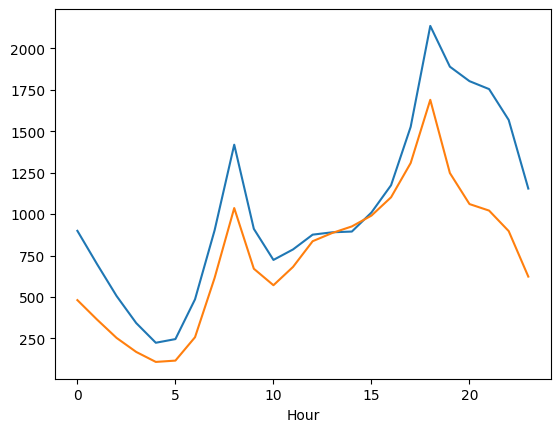

In [ ]:
data_spring = data[data["Seasons"]=="Spring"]
data_summer = data[data["Seasons"]=="Summer"]

data_summer_rentedbike = data_summer["Rented Bike Count"]
data_spring_rentedbike = data_spring["Rented Bike Count"]
data_summer_rentedbike = data_summer_rentedbike.groupby(data_summer["Hour"]).mean()
data_spring_rentedbike = data_spring_rentedbike.groupby(data_spring["Hour"]).mean()
data_summer_rentedbike.plot()
data_spring_rentedbike.plot()

In [8]:
# Create a contingency table
contingency_table = pd.DataFrame({
    'Summer': data_summer_rentedbike,
    'Spring': data_spring_rentedbike
}, index=data_summer_rentedbike.index)
contingency_table["Summer"] = contingency_table["Summer"]/contingency_table["Summer"].sum()
contingency_table["Spring"] = contingency_table["Spring"]/contingency_table["Spring"].sum()


In [9]:
from scipy.stats import chisquare

# Perform the Chi-squared test for goodness of fit .
chi2_stat, p_value = chisquare(contingency_table["Summer"], f_exp=contingency_table["Spring"])
print(f'Chi2-statistic: {chi2_stat}, p-value: {p_value}')


Chi2-statistic: 0.05291955549018908, p-value: 1.0


In [10]:
### get the p value from the coningency table manually .

# Calculate the chi-squared statistic
chi_squared = 0
for i in contingency_table.index:
    chi_squared += ((contingency_table["Summer"][i] - contingency_table["Spring"][i])**2)/contingency_table["Spring"][i]

    
chi_squared

# Calculate the degrees of freedom

dof = (24-1)*(2-1)
dof

# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi_squared, dof)
p_value




1.0

#### Since p_value is greater than 0.05 , we fail to reject the null hypothesis .Hence we cannot say that two distro are not same by 95% confidence level .